# ✏️ Implicit vs. explicit data


As mentioned in the video exercise, feedback used in recommendation engines can be explicit or implicit.

The dataset `listening_history_df` has been loaded for you. This dataset contains columns identifying the users, the songs they listen to, along with:

- Skipped Track: A Boolean column recording whether the user skipped the song or listened to it to the end.
- Rating: The score out of 10 the user gave the song.

In this exercise, you will explore the data and from this exploration identify which columns best reflect explicit feedback versus implicit feedback.


- Inspect the first 5 rows of listening_history_df.
- Print the number of unique values in the Rating and Skipped Track columns.
- Display a histogram of the values in the Rating column

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
listening_history_df = pd.read_csv('listening_history2.csv')
listening_history_df.columns = ['User', 'Song Title', 'Skipped Track', 'Rating']
listening_history_df.head()

,User,Song Title,Skipped Track,Rating
0,User_001,Like a Rolling Stone,True,6
1,User_001,Imagine,False,2
2,User_001,What's Going On,False,9
3,User_002,Respect,False,6
4,User_003,Good Vibrations,True,0


       User            Song Title  Skipped Track  Rating
0  User_001  Like a Rolling Stone           True       6
1  User_001               Imagine          False       2
2  User_001       What's Going On          False       9
3  User_002               Respect          False       6
4  User_003       Good Vibrations           True       0
Rating           11
Skipped Track     2
dtype: int64


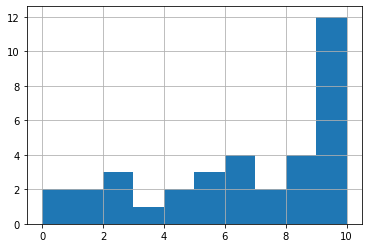

In [12]:
# Inspect the listening_history_df DataFrame
print(listening_history_df.head())

# Calculate the number of unique values
print(listening_history_df[['Rating', 'Skipped Track']].nunique())

# Display a histogram of the values in the Rating column
listening_history_df['Rating'].hist()
plt.show()

## ❓ Question

From the provided description and your exploration of the data, select which of its columns would be considered explicit data.



- User ❌
 
- Skipped Track ❌

- Rating ✅

- None of the columns could be used. ❌

# 💻 Finding the most popular items

```python
book_df['book'].value_counts()
print(book_df.value_counts().index)

# Finding the most liked items
avg_rating_df = user_ratings[["book", "rating"]].groupby(['book']).mean()
avg_rating_df.head()

# Sorting items by avg_rating
sorted_avg_rating_df = avg_rating_df.sort_values(by="rating", ascending=False)
sorted_avg_rating_df.head()

# How many times the book was reviwed?
(user_ratings['title']=='The Girl in the Fog').sum()

book_frequency = user_ratings["book"].value_counts()
print(book_frequency)

# Books with more than 100 reviews
frequently_reviewed_books = book_frequency[book_frequency > 100].index
print(frequently_reviewed_books)

# Frequent Books
frequent_books_df = user_ratings_df[user_ratings_df["book"].isin(frequently_reviewed_books)]


frequent_books_avgs = frquently_reviewed_books[["title", "rating"]].groupby('title').mean()
print(frequent_books_avgs.sort_values(by="rating", ascending=False).head())
```

# ✏️ Introduction to non-personalized recommendations

One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.

The DataFrame `user_ratings_df`, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.

- Calculate the number of times each movie occurs in the dataset.
- Print the titles of the top five most frequently seen movies.

In [1]:
import pandas as pd

In [2]:
user_ratings_df = pd.read_csv('user_ratings.csv')

In [4]:
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object')


## ❓ Question

Based on your analysis, what is the most frequently watched movie overall?



- Forrest Gump ✅

- Pulp Fiction ❌

- The Matrix ❌

- 329 ❌

# ✏️ Improved non-personalized recommendations

Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. To understand how a viewer actually felt about a movie, more explicit data is useful. Thankfully, you also have ratings from each of the viewers in the Movie Lens dataset.

In this exercise, you will find the average rating of each movie in the dataset, and then find the movie with the highest average rating.

You will use the same `user_ratings_df` as you used in the previous exercise, which has been loaded for you.


- Find the average rating for each of the movies and store it as a DataFrame called `average_rating_df`.
- Sort the `average_rating_df` DataFrame by the average rating column from highest to lowest and store it as `sorted_average_ratings`.
- Print the entries for the top five highest ranked movies in `sorted_average_ratings`.

In [12]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


# ✏️ Combining popularity and reviews

In the past two exercises, you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their weaknesses.

Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

In this exercise, you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.

- Generate a list of the names of the movies appearing more than 50 times in `user_ratings_df` and store it as `popular_movies`.

In [7]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Chasing Amy (1997)', 'Mystic River (2003)',
       'Grand Budapest Hotel, The (2014)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Training Day (2001)', 'Bad Boys (1995)',
       'Splash (1984)', 'Mulholland Drive (2001)',
       'The Devil's Advocate (1997)'],
      dtype='object', length=437)


- Filter the original `user_ratings_df` DataFrame by the `popular_movies` list to create a popular_movies_rankings DataFrame and print the results.

In [8]:
# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)

       userId  movieId  rating   timestamp                 title  \
0           1        1     4.0   964982703      Toy Story (1995)   
1           5        1     4.0   847434962      Toy Story (1995)   
2           7        1     4.5  1106635946      Toy Story (1995)   
3          15        1     2.5  1510577970      Toy Story (1995)   
4          17        1     4.5  1305696483      Toy Story (1995)   
...       ...      ...     ...         ...                   ...   
79246     603     1997     4.0   953925513  Exorcist, The (1973)   
79247     606     1997     3.0  1178911117  Exorcist, The (1973)   
79248     607     1997     5.0   963079420  Exorcist, The (1973)   
79249     608     1997     4.5  1117502891  Exorcist, The (1973)   
79250     610     1997     4.0  1479543021  Exorcist, The (1973)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1      Adventure|Animation|Children|Comedy|Fantasy  
2      Adventure|Animati

- Find the average rating given to the frequently watched films in `popular_movies_rankings` and store it as `popular_movies_average_rankings`.
- Print the entries in `popular_movies_average_rankings` that contain the highest-ranked movies.

In [9]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


# ✏️ Non-personalized suggestions

- Most commonly seen together items.

### Creating the pairing function

In [10]:
from itertools import permutations

def create_pairs(x):
    
    pairs = pd.DataFrame(list(permutations(x.values, 2)),
                        columns = ['book_a', 'book_b'])
    return pairs

In [14]:
book_df = user_ratings_df.copy()
book_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [16]:
book_pairs = book_df.groupby('userId')['title'].apply(create_pairs)

In [19]:
book_pairs

book_a                            book_b
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]

In [20]:
# Cleaning up the results
book_pairs = book_pairs.reset_index(drop=True)
print(book_pairs.head())

             book_a                       book_b
0  Toy Story (1995)      Grumpier Old Men (1995)
1  Toy Story (1995)                  Heat (1995)
2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
3  Toy Story (1995)   Usual Suspects, The (1995)
4  Toy Story (1995)   From Dusk Till Dawn (1996)


In [25]:
# Counting the pairs
pair_counts = book_pairs.groupby(['book_a', 'book_b']).size()
pair_counts_df = pair_counts.to_frame(name='size').reset_index()
pair_counts_sorted = pair_counts_df.sort_values(by='size', ascending=False)
pair_counts_sorted

,book_a,book_b,size
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222
...,...,...,...
10737102,"History Boys, The (2006)",8 Seconds (1994),1
10737100,"History Boys, The (2006)","7th Voyage of Sinbad, The (1958)",1
10737099,"History Boys, The (2006)","6th Day, The (2000)",1
10737098,"History Boys, The (2006)",54 (1998),1


In [27]:
pair_counts_sorted[pair_counts_sorted['book_a']=='Forrest Gump (1994)']

,book_a,book_b,size
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
8538399,Forrest Gump (1994),"Silence of the Lambs, The (1991)",199
8535484,Forrest Gump (1994),Jurassic Park (1993),198
8536292,Forrest Gump (1994),"Matrix, The (1999)",194
...,...,...,...
8533615,Forrest Gump (1994),Embassy (2013),1
8533614,Forrest Gump (1994),"Embalmer, The (Imbalsamatore, L') (2002)",1
8533612,Forrest Gump (1994),Elsa & Fred (2014),1
8533611,Forrest Gump (1994),Elsa & Fred (2005),1
